<a href="https://colab.research.google.com/github/hedgehog-zowie/tf-study/blob/master/fashion_mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一个tensorflow例子，使用tensorflow的keras api实现服饰图像分类。

1. 导入相关module。

In [1]:
# import modules
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 查看各个module的版本
print('tensorflow version: ', tf.__version__)
print('numpy version: ', np.__version__)
print('matplot version: ', mpl.__version__)

tensorflow version:  1.13.0-rc1
numpy version:  1.14.6
matplot version:  3.0.2


2. 导入fashion mnist数据集。keras已经封装了一些数据集，包括mnist、fashion mnist、boston housing price等，我们可以非常简便地导入这些数据集。

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# train_images和train_labels是训练集，test_images和test_labels是测试集
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train_images.shape: ', train_images.shape)
print('test_images.shape: ', test_images.shape)

train_images.shape:  (60000, 28, 28)
test_images.shape:  (10000, 28, 28)


3. 对数据进行预处理，本例中仅需要将各个像素值缩放到0-1之间即可。

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

4. 设置层，包括层数，各层的神经元个数、激活函数等。

In [4]:
model = keras.Sequential([
    # 将图像组成向量进行扁平化处理，即将28 X 28的二维数组转换成一维数组
    keras.layers.Flatten(input_shape=(28,28)),
    # 全连接层，包含128个神经元，激活函数为relu
    keras.layers.Dense(128, activation = tf.nn.relu),
    # 全连接层，包含10个神经元，激活函数为softmax
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


5. 编译模型，需要设置3个重要参数优化器、损失函数、评估指标。

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

6. 训练模型，将数据传递到模型中进行拟合，该方法也有几个重要的参数：epochs次数、batch_size（批量大小）、validation_data（验证集，包括data和label），如：model.fit(data, labels, epochs = 10, batch_size = 100, validation_data = (val_data, val_labels))。

val_images.shape: (10000, 28, 28) ,t_images.shape: (50000, 28, 28)
val_labels.shape: (10000,) ,t_labels.shape: (50000,)
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 84us/sample - loss: 0.5113 - acc: 0.8201 - val_loss: 0.4264 - val_acc: 0.8449
Epoch 2/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.3844 - acc: 0.8621 - val_loss: 0.3737 - val_acc: 0.8614
Epoch 3/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.3437 - acc: 0.8754 - val_loss: 0.3760 - val_acc: 0.8666
Epoch 4/10
50000/50000 [==============================] - 4s 87us/sample - loss: 0.3230 - acc: 0.8813 - val_loss: 0.3255 - val_acc: 0.8771
Epoch 5/10
50000/50000 [==============================] - 4s 87us/sample - loss: 0.3027 - acc: 0.8884 - val_loss: 0.3270 - val_acc: 0.8804
Epoch 6/10
50000/50000 [==============================] - 4s 83us/sample - loss: 0.2878 - acc: 0.8939 - val_loss: 0.3371 - val_acc: 0.8

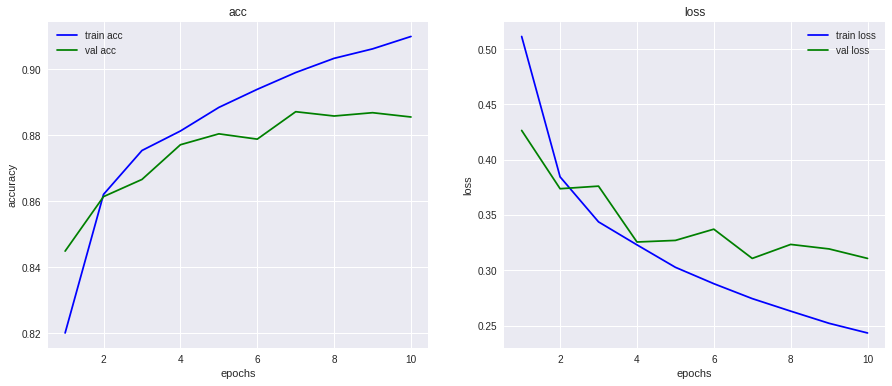

In [6]:
# 准备验证集和训练集
val_images = train_images[:10000]
t_images = train_images[10000:]
print('val_images.shape:', val_images.shape,',t_images.shape:', t_images.shape)
val_labels = train_labels[:10000]
t_labels = train_labels[10000:]
print('val_labels.shape:', val_labels.shape,',t_labels.shape:', t_labels.shape)
# 训练模型
history = model.fit(t_images, t_labels, epochs = 10, validation_data = (val_images, val_labels))
# history对象是一个字典，包含训练期间发生的所有情况
history_dict = history.history
print('history_dict.keys(): ', history_dict.keys())

# 画图
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, acc, color='blue', label='train acc')
plt.plot(epochs, val_acc, color='green', label='val acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, color='blue', label='train loss')
plt.plot(epochs, val_loss, color='green', label='val loss')
plt.legend()

plt.show()

7. 模型评估，使用测试集进行模型评估。

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test loss: ', test_loss, ', test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3451 - acc: 0.8782
test loss:  0.34509223532676697 , test accuracy:  0.8782


8. 模型推理（预测），keras仅支持批量推理，因此，当我们仅需要对一个图像进行推理时，也需要将其添加到列表中，再调用predict方法。

In [8]:
# 对所有测试集进行推理
predictions = model.predict(test_images)

print('对第0个图像的预测结果：', predictions[0])
# 第0个图片真实分类
c0 = test_labels[0]
# 预测第0个图片的分类
p0 = np.argmax(predictions[0])
print('真实：', c0, '，预测为： ', p0)

# 对单个图像进行推理
img = test_images[1]
img = np.expand_dims(img, 0)
print('img1 shape: ', img.shape)
predictions_single = model.predict(img)
print('对单个图像的预测结果：', predictions_single)
# 第1个图片真实分类
c1 = test_labels[1]
# 预测第1个图片的分类
p1 = np.argmax(predictions_single[0])
print('真实：', c1, '，预测为： ', p1)

对第0个图像的预测结果： [1.55682685e-07 1.01729620e-08 4.88996079e-08 4.04508915e-09
 1.83119170e-07 8.37069761e-04 5.80433657e-08 7.84719270e-03
 1.16554915e-07 9.91315186e-01]
真实： 9 ，预测为：  9
img1 shape:  (1, 28, 28)
对单个图像的预测结果： [[9.2263661e-05 1.5553426e-12 9.9886191e-01 2.8457933e-10 2.0250703e-04
  4.8646772e-12 8.4329303e-04 3.5508804e-21 4.1980173e-11 2.5807473e-17]]
真实： 2 ，预测为：  2
